In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("airlines_flights_data.csv")
df.head(4)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
df.drop(columns=['index', 'flight'], inplace=True)

In [8]:
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)


C:\Users\Dell\AppData\Local\Temp\ipykernel_9412\2225630478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)


In [9]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10.00,49,81585


Text(0.5, 1.0, 'Price Distribution')

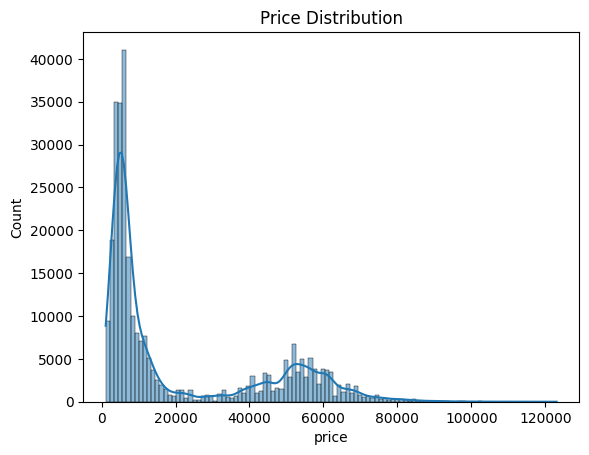

In [12]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")

<Axes: title={'center': 'Average Price by Airline'}, ylabel='airline'>

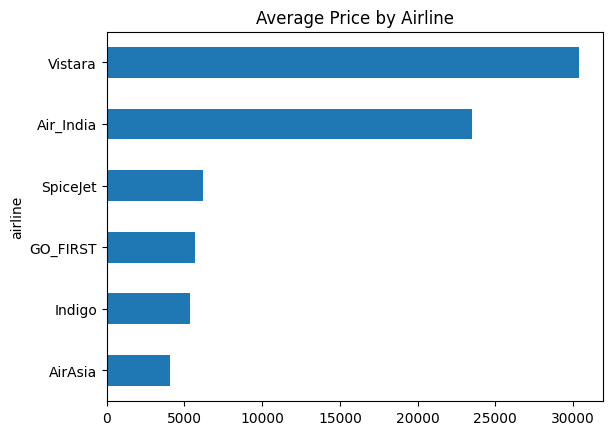

In [13]:
# 2. Average Price by Airline
airline_avg = df.groupby('airline')['price'].mean().sort_values()
airline_avg.plot(kind='barh', title="Average Price by Airline")

Text(0.5, 1.0, 'Class-wise Price Comparison')

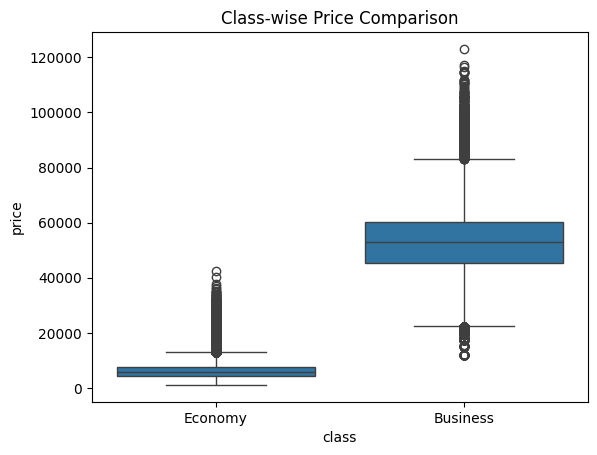

In [14]:
# 3. Class Impact
sns.boxplot(data=df, x='class', y='price')
plt.title("Class-wise Price Comparison")

Text(0.5, 1.0, 'Stops vs Price')

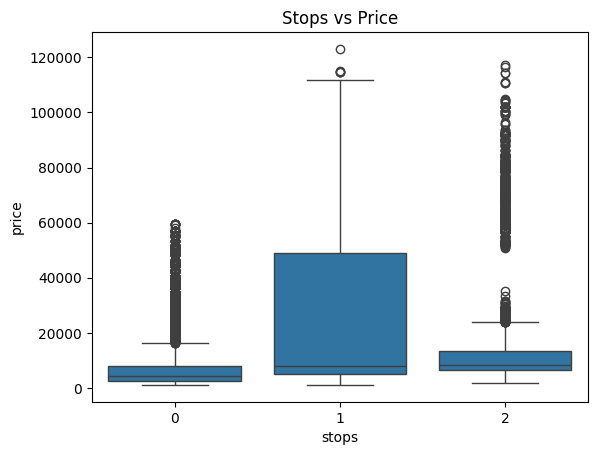

In [15]:
# 4. Stops Impact
sns.boxplot(data=df, x='stops', y='price')
plt.title("Stops vs Price")

Text(0.5, 1.0, 'Price vs Days Left')

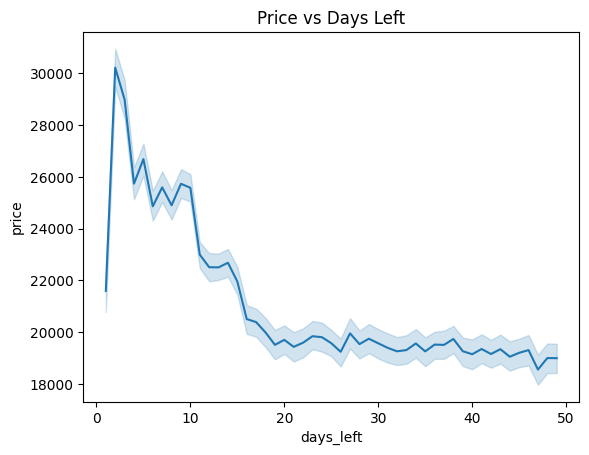

In [16]:
# 5. Price vs Days Left
sns.lineplot(data=df, x='days_left', y='price')
plt.title("Price vs Days Left")

Text(0.5, 1.0, 'Duration vs Price')

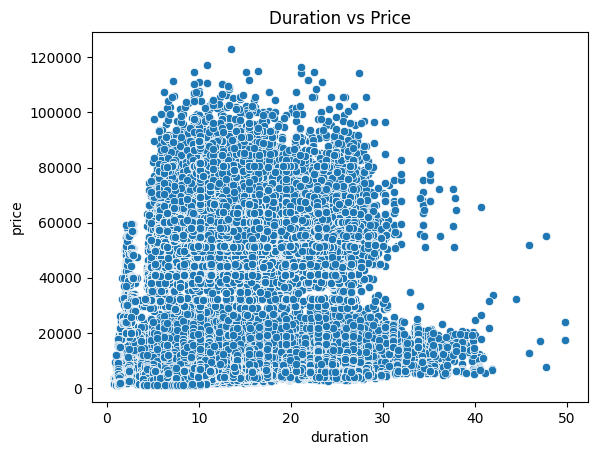

In [17]:
# 6. Duration vs Price
sns.scatterplot(data=df, x='duration', y='price')
plt.title("Duration vs Price")